In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [31]:
# Load data
lefse = pd.read_csv('lefse_de_output.PBS.LGG.SCB34.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.sort_values(by='LDAscore', ascending=True)
# Define the condition to filter the data (e.g., Category == 'X')
lefse

,Feature,Pvalues,FDR,PBS-SCB34,Lac-SCB34,LDAscore
4,Rothia,0.017622,0.044055,2739.2,4947.80,-3.04
5,Enterococcus,0.028460,0.060985,2148.8,4026.80,-2.97
7,Haemophilus,0.044610,0.074350,274.0,671.67,-2.30
6,Clostridium_sensu_stricto_1,0.044126,0.074350,125.0,53.50,1.57
3,Staphylococcus,0.017365,0.044055,277.4,80.00,2.00
1,Veillonella,0.002822,0.021167,781.4,0.00,2.59
0,Morganella,0.002822,0.021167,874.6,0.00,2.64
2,Romboutsia,0.006170,0.023137,2043.8,183.50,2.97


In [32]:
# Specify the columns to consider for finding the max
columns_to_check = ['PBS-SCB34','Lac-SCB34']
# columns_to_check = ['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']

# Find the column with the maximum value for each row
lefse['Response'] = lefse[columns_to_check].idxmax(axis=1)
lefse


,Feature,Pvalues,FDR,PBS-SCB34,Lac-SCB34,LDAscore,Response
4,Rothia,0.017622,0.044055,2739.2,4947.80,-3.04,Lac-SCB34
5,Enterococcus,0.028460,0.060985,2148.8,4026.80,-2.97,Lac-SCB34
7,Haemophilus,0.044610,0.074350,274.0,671.67,-2.30,Lac-SCB34
6,Clostridium_sensu_stricto_1,0.044126,0.074350,125.0,53.50,1.57,PBS-SCB34
3,Staphylococcus,0.017365,0.044055,277.4,80.00,2.00,PBS-SCB34
1,Veillonella,0.002822,0.021167,781.4,0.00,2.59,PBS-SCB34
0,Morganella,0.002822,0.021167,874.6,0.00,2.64,PBS-SCB34
2,Romboutsia,0.006170,0.023137,2043.8,183.50,2.97,PBS-SCB34


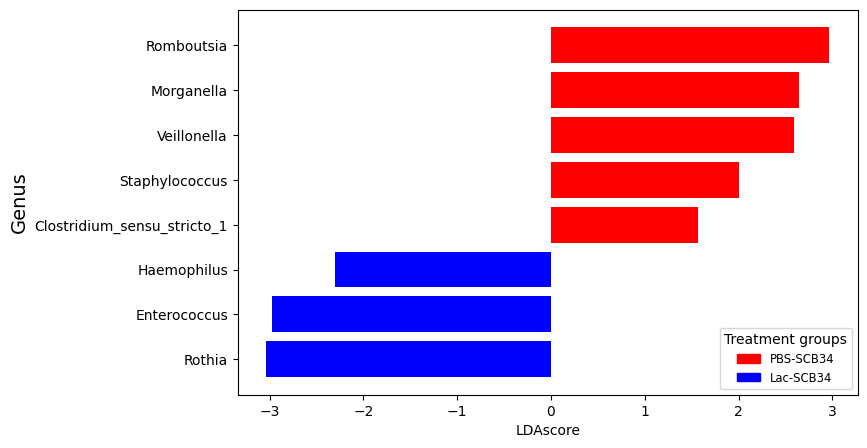

In [35]:
colors = lefse['Response'].map({'PBS-SCB34': 'red','Lac-SCB34': 'blue'})
# colors = lefse['Response'].map({'PBS-PBS': 'red', 'PBS-SCB34': '#01BEC2','Lac-PBS': 'green','Lac-SCB34': 'purple'})

plt.figure(figsize=(8, 5))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse['Feature'], lefse['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Genus',fontsize = 14)

# Create a legend for 'Category' colors
# red_patch = mpatches.Patch(color='red', label='PBS-PBS')
# blue_patch = mpatches.Patch(color='#01BEC2', label='PBS-SCB34')
# green_patch = mpatches.Patch(color='green', label='Lac-PBS')
# orange_patch = mpatches.Patch(color='purple', label='Lac-SCB34')
blue_patch = mpatches.Patch(color='red', label='PBS-SCB34')
orange_patch = mpatches.Patch(color='blue', label='Lac-SCB34')

# plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Treatment groups', loc='lower right',fontsize='small')
plt.legend(handles=[ blue_patch,orange_patch ], title='Treatment groups', loc='lower right',fontsize='small')
plt.show()